# 📘 Fine-tuned DeepSeek-OCR Evaluation & Analysis

## 1. Installation

In [1]:
# 1. Cài đặt Unsloth & Dependencies
!pip install --no-deps bitsandbytes accelerate xformers peft trl triton cut_cross_entropy unsloth_zoo
!pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" "hf_transfer"
!pip install --no-deps unsloth

# 2. Cài đặt Transformers & TRL đúng version yêu cầu
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2

# 3. Thư viện hỗ trợ
!pip install jiwer einops addict easydict torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 33.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.5/465.5 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.8/506.8 kB 9.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 41.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 19.0.1
    Uninstalling pyarrow-19.0.1:
      Successfully uninstalled pyarrow-19.0.1
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.18
    Uninstalling multiprocess-0.70.18:
      Successfully uninsta

In [2]:
import os
os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## 2. Load fine-tuned model

In [3]:
import torch
from unsloth import FastVisionModel
from transformers import AutoModel
from peft import PeftModel
from huggingface_hub import snapshot_download

# Ép buộc chỉ sử dụng 1 GPU 
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

# Đường dẫn Checkpoint (đảm bảo đúng path trên Kaggle của bạn)
FINETUNED_PATH = "/kaggle/input/deepseek-ocr-finetuning/model/checkpoint-660/" 

print("🚀 Bắt đầu quy trình Load Model...")

# BƯỚC 1: Tải/Kiểm tra Model base
print("⬇️ Đang kiểm tra/tải Base Model...")
base_model_path = snapshot_download("unsloth/DeepSeek-OCR", local_dir="deepseek_ocr_base")

# BƯỚC 2: Load Base Model
print("🔄 Đang load Base Model vào VRAM...")
base_model, tokenizer = FastVisionModel.from_pretrained(
    "./deepseek_ocr_base", # Load từ folder vừa tải
    load_in_4bit = True,
    auto_model = AutoModel,
    trust_remote_code = True,
    unsloth_force_compile = True,
    use_gradient_checkpointing = "unsloth",
    device_map = "cuda:0", # Chỉ định rõ GPU 0
)

# BƯỚC 3: Gắn Adapter LoRA
if os.path.exists(FINETUNED_PATH):
    print(f"🔄 Đang gắn LoRA Adapter từ: {FINETUNED_PATH}")
    try:
        # Load adapter đè lên base model
        model = PeftModel.from_pretrained(base_model, FINETUNED_PATH)
        
        # Chuyển sang chế độ Inference
        FastVisionModel.for_inference(model)
        print("✅ Đã load Model Fine-tuned thành công! Sẵn sàng sử dụng.")
        
    except Exception as e:
        print(f"❌ Lỗi khi gắn Adapter: {e}")
else:
    print(f"❌ Không tìm thấy đường dẫn: {FINETUNED_PATH}")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


2025-12-03 08:51:21.692547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764751881.954357      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764751882.053091      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[xformers|WARNING]WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.9.0+cu128 with CUDA 1208 (you have 2.6.0+cu124)
    Python  3.10.19 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


Switching to PyTorch attention since your Xformers is broken.

Unsloth: Xformers was not installed correctly.
Please install xformers separately first.
Then confirm if it's correctly installed by running:
python -m xformers.info

Longer error message:
xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.9.0+cu128 with CUDA 1208 (you have 2.6.0+cu124)
    Python  3.10.19 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
🦥 Unsloth Zoo will now patch everything to make training faster!
Unsloth: Could not import trl.trainer.alignprop_trainer: Failed to import trl.trainer.alignprop_trainer because of the following error (look up to see its traceback):
Failed to import trl.models.modeling_sd_base because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable

.gitattributes: 0.00B [00:00, ?B/s]

README-checkpoint.md: 0.00B [00:00, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

assets/fig1.png:   0%|          | 0.00/396k [00:00<?, ?B/s]

assets/show1.jpg:   0%|          | 0.00/117k [00:00<?, ?B/s]

assets/show2.jpg:   0%|          | 0.00/216k [00:00<?, ?B/s]

assets/show3.jpg:   0%|          | 0.00/247k [00:00<?, ?B/s]

assets/show4.jpg:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

conversation.py: 0.00B [00:00, ?B/s]

deepencoder.py: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

processor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


🔄 Đang load Base Model vào VRAM...
Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.11.6: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr_base and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔄 Đang gắn LoRA Adapter từ: /kaggle/input/deepseek-ocr-finetuning/model/checkpoint-660/
✅ Đã load Model Fine-tuned thành công! Sẵn sàng sử dụng.


## 3. Metrics & Inference

In [11]:
import json
import jiwer
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import shutil

# Tạo thư mục tạm để model lưu kết quả debug (Tránh lỗi output_path)
OUTPUT_DIR = "/kaggle/working/eval_output"
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
os.makedirs(OUTPUT_DIR, exist_ok=True)

def calculate_cer(reference, hypothesis):
    """Tính Character Error Rate (CER)"""
    if not reference: return 1.0 # Nếu nhãn rỗng mà model đoán ra chữ -> sai 100%
    return jiwer.cer(reference, hypothesis)

def evaluate_dataset(jsonl_path, max_samples=None):
    print(f"📂 Đang đánh giá trên tập: {jsonl_path}")
    
    results = []
    total_cer = 0
    count = 0
    
    instruction = "<image>\nFree OCR. "
    
    # Đọc dữ liệu
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    # Nếu muốn test nhanh thì giới hạn số mẫu
    if max_samples:
        lines = lines[:max_samples]
        
    print(f"🚀 Bắt đầu chạy Inference trên {len(lines)} mẫu...")
    
    for line in tqdm(lines):
        item = json.loads(line)
        img_path = item['image']
        ground_truth = item['text']
        
        # Bỏ qua nếu ảnh không tồn tại
        if not os.path.exists(img_path): continue
        
        try:
            # Chạy model
            res = model.infer(
                tokenizer,
                prompt=instruction,
                image_file=img_path,
                output_path=OUTPUT_DIR, # Bắt buộc phải có
                base_size=1024,
                image_size=640,
                crop_mode=True,
                save_results=True,
                test_compress=False
            )
            
            # Lấy text dự đoán
            prediction = res[0] if isinstance(res, list) else res
            
            # Tính CER
            cer = calculate_cer(ground_truth, prediction)
            total_cer += cer
            count += 1
            
            # Lưu kết quả để phân tích sau
            results.append({
                "image": img_path,
                "ground_truth": ground_truth,
                "prediction": prediction,
                "cer": cer
            })
            
        except Exception as e:
            print(f"⚠️ Lỗi mẫu {img_path}: {e}")
            
    # Tổng hợp
    avg_cer = total_cer / count if count > 0 else 0
    print(f"\n{'='*30}")
    print(f"📊 KẾT QUẢ ĐÁNH GIÁ (Trên {count} mẫu)")
    print(f"🎯 Average CER: {avg_cer:.4f} (Thấp hơn là tốt hơn)")
    print(f"   - Tức là sai khoảng {avg_cer*100:.2f}% số ký tự")
    print(f"{'='*30}\n")
    
    return pd.DataFrame(results)

print("✅ Đã chuẩn bị hàm đánh giá")

✅ Đã chuẩn bị hàm đánh giá


### Run evaluation

In [13]:
# Đường dẫn file Test 
TEST_FILE = "/kaggle/input/uit-hwdb/test_line.jsonl"

# Chạy đánh giá 
if os.path.exists(TEST_FILE):
    df_results = evaluate_dataset(TEST_FILE, max_samples=None) 
    
    # Lưu kết quả ra CSV để làm báo cáo
    df_results.to_csv("evaluation_results.csv", index=False)
    print("💾 Đã lưu bảng kết quả chi tiết vào 'evaluation_results.csv'")
else:
    print(f"⚠️ Không tìm thấy file {TEST_FILE}")

📂 Đang đánh giá trên tập: /kaggle/input/uit-hwdb/test_line.jsonl
🚀 Bắt đầu chạy Inference trên 201 mẫu...


  0%|          | 0/201 [00:00<?, ?it/s]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Việc tiếp về vụ anh Trương Xuân Đại. Ngày từ khi tổ báo " có phản của
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  0%|          | 1/201 [00:06<22:15,  6.68s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
những người nói lên sự thật " phát hành, nhân lâm đặc đã bây từ xu thả sẻ,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  1%|          | 2/201 [00:14<24:25,  7.36s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ứng hộ anh Trương Xuân Đại. Mặt bọn đọc 67 tuổi ở Q. 11 đến gửi tặng anh Trương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  1%|▏         | 3/201 [00:22<25:20,  7.68s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xuân Đại 150.000 đồng, một số người trên thùng ở Tân Bình gửi tặng 100.000 đ,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  2%|▏         | 4/201 [00:30<25:23,  7.73s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
một thanh niên tên Hà đến quận 200.000 đ. Sau đó mùa lãi là ngày
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  2%|▏         | 5/201 [00:37<24:23,  7.47s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nhiều hơn đặc quốc đến bảy số sự chủ sở, cũng hơn
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  3%|▎         | 6/201 [00:43<23:18,  7.17s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Ban bảo lập báo trước tư công quyền Trịnh giá tổng nhân công nhân
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  3%|▎         | 7/201 [00:50<22:34,  6.98s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
để tổ chức cuộc ở đường lưu động A5 10 tuần đây. Đây vì người dân
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  4%|▍         | 8/201 [00:57<22:48,  7.09s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đặc cưước cho niềm tin! Qua bốn chị, bạn thân bốn đã lượt về về tổ cáo những
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  4%|▍         | 9/201 [01:05<23:16,  7.27s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Đại phạm của công trình đường liên cảng A5 mang năm trước đây, nhưng nay
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  5%|▍         | 10/201 [01:11<22:09,  6.96s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
mái biệt " việc bán chúng còn và bắt đập đá mang cắm báo bí động vật rừng phức
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  5%|▌         | 11/201 [01:19<23:03,  7.28s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cho người sống mãi, những người mà " chéo bốn vô cùng xứng đáng " và đoán
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  6%|▌         | 12/201 [01:26<22:26,  7.13s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
hầm hương à.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  6%|▋         | 13/201 [01:29<18:29,  5.90s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Thế nhưng những hiệp nợ ấy già na ông Nguyễn thì long thang, phải bạt, kể như
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  7%|▋         | 14/201 [01:37<20:03,  6.44s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
" có bố, kể thì cây cứ tôm con chàng, đỡ thì đã lượm ve chai, phải là túc tùng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  7%|▋         | 15/201 [01:45<21:36,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
những còn dắt foam bơ rằng qua ngày. Ngồi nơi môi trường, chứ đây là phần cháu
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  8%|▊         | 16/201 [01:53<22:11,  7.19s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tôi sinh thế trên ba nhóm: con người ấy đã bị dây xuống đáy cùng cả cá,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  8%|▊         | 17/201 [02:00<21:57,  7.16s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
công! Cũng may mà anh Em đã thông hiểu, đó chứ là niềm cãi vã vẫn
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  9%|▉         | 18/201 [02:07<21:52,  7.17s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
là những định đã mưa các đông nghiệp, người chôn lên trồng xe,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  9%|▉         | 19/201 [02:13<21:03,  6.94s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
anh không dám tôi hay việc thay điểm giảm tín từ lý giải mà mình
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 10%|▉         | 20/201 [02:20<20:18,  6.73s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Lại mùa, khi thành lập đã xác định sai phạm, họ không xử lý mà đã ngậm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 10%|█         | 21/201 [02:27<20:54,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
liên ngay đến vùng? Và khi nhận yêu thả nguồn xung kinh tế, việc chuyển mại vùng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 11%|█         | 22/201 [02:36<22:01,  7.38s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
có thể hình dung ông như diện bên cảng A5 chắc nhắn phải vụ hoạt động của
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 11%|█▏        | 23/201 [02:42<21:27,  7.23s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
các anh ài đến cư trại khu dự kiến tận Thành. Với tư khủng khiếp phục ngày
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 12%|█▏        | 24/201 [02:50<21:43,  7.36s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
mà còn dễ con đường xâm ý, sự thự con, có phải là gặp thiên nhiên
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 12%|█▏        | 25/201 [02:57<21:18,  7.26s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
bán xã / 1 mà muốn đổi địa cầu Châu Phú 6 hộ không 1 mà cũng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 13%|█▎        | 26/201 [03:05<21:17,  7.30s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tội nghĩa và việc mại ớt, bao nhiêu vợ chồi bán việc và cả thiện vui các ngày
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 13%|█▎        | 27/201 [03:13<22:08,  7.63s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([7, 100, 1280])
của người lao động - đồng bộ - hộ nghèo?
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 14%|█▍        | 28/201 [03:18<20:05,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chúng ta là " hòa nghiêm văn hóa Quảng Nam " vì nếu làm lại của công nhân
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 14%|█▍        | 29/201 [03:25<19:59,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
xây dựng bóng vóc đi mọi gian phép căng gai phạm của công trình đường
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 15%|█▍        | 30/201 [03:32<19:22,  6.80s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
hơn công AS ", nhưng chắc lơ những cơ hữu thành nguyên vật liệu "
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 15%|█▌        | 31/201 [03:38<18:29,  6.53s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
trường Chính thức ban đầu anh Đại vứt nhân dự nghiệp bị xót, ý nghĩa
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 16%|█▌        | 32/201 [03:45<18:48,  6.68s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
những nội phạm (đã có muốn mua) và có liên pháp liên hữu khối thực
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 16%|█▋        | 33/201 [03:52<19:14,  6.87s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
những bài bản " đó, có như vậy muốn gìn văn cổ phê quán " đã khiến người
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 17%|█▋        | 34/201 [03:59<19:33,  7.03s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cả người dân sẽ không còn khả năng đặt được cho mỗi kim nợ không
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 17%|█▋        | 35/201 [04:06<18:57,  6.85s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Phân tư mại của chúng tôi hay không? Nhiệm vụ của chúng tôi là góp
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 18%|█▊        | 36/201 [04:12<18:38,  6.78s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
20 người vậy mà hình thức nguyền thay lại ký kết? Chỉ là anh Đại Văn Hải
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 18%|█▊        | 37/201 [04:20<18:47,  6.87s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
người NH, thân phận, luật ngày càng họ đi tiếp cả đầu nửa nơi cũng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 19%|█▉        | 38/201 [04:27<18:48,  6.92s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
như bốn chạnh lòng biển phía hội đã xã hội nhà cửa đủ nỗ lực
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 19%|█▉        | 39/201 [04:34<19:03,  7.06s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
vô minh bản " thất nghiệp, lẫn vào cảnh đấu tranh như thế nào. Vì họ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 20%|█▉        | 40/201 [04:41<19:12,  7.16s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
để bán được thực tế tại văn phòng, Chính hãnh đã hỏng thêm người bị
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 20%|██        | 41/201 [04:49<19:13,  7.21s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
căn hầm dự tiến vác họ phải đưa ra người tháng bạc bợ đợ kênh sư chàng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 21%|██        | 42/201 [04:57<20:12,  7.63s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
chất, ngôn ngữ.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 21%|██▏       | 43/201 [05:01<16:38,  6.32s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
và bám này, chúng ta cũng còn hồi sức hằng ngày mà chính mình.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 22%|██▏       | 44/201 [05:07<16:53,  6.46s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Thứ trưởng Bộ Tài nguyên và môi trường Đặng Hùng Võ đã đề xuất
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 22%|██▏       | 45/201 [05:14<17:00,  6.54s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
có thể " khuyến khích nhà đầu tư thỏa thuận với người sử đất để nhận
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 23%|██▎       | 46/201 [05:21<17:08,  6.64s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chuyển những hoặc thủi quyết sử dụng đất, nhận góp vốn bằng quyền sử
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 23%|██▎       | 47/201 [05:28<17:19,  6.75s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
dung đất... " Nhưng tại hội nghị hôm qua, tiếng nói từ các sở tài nguyên
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 24%|██▍       | 48/201 [05:35<17:28,  6.85s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
và môi trường lạnh điều hành " p.a " điều khoản này ra khỏi dự thảo.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 24%|██▍       | 49/201 [05:42<17:45,  7.01s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
giám đốc Sở Tài nguyên và môi trường Hải Phòng Chu Minh Tuấn cho
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 25%|██▍       | 50/201 [05:49<17:03,  6.78s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
biết thành phố cảng đứng ở dựng cơ chế " đoá " thuận " trong một số
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 25%|██▌       | 51/201 [05:55<16:47,  6.72s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
rất ít trường hợp, vậy mà đã gây phản ứng với theo kiểu đầy chuyện thì
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 26%|██▌       | 52/201 [06:02<16:48,  6.77s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
mạnh : anh này nhận tiền rồi quay lại đòi nữa, anh lừa theo thuốc
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 26%|██▋       | 53/201 [06:09<17:01,  6.90s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
xong quay ra đòi thoải thoải lại...
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 27%|██▋       | 54/201 [06:14<15:08,  6.18s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chưa kể để doanh nghiệp và người dân " nói chuyện " với nhau như
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 27%|██▋       | 55/201 [06:20<15:12,  6.25s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
vậy, quyền của cơ quan quản lý nhà nước sẽ mất đi ". Tôi cũng có vụ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 28%|██▊       | 56/201 [06:27<15:48,  6.54s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nghỉ như đường chợ " Bỏ được qui định này đi thì tột. Cuối cùng một lúc chúng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 28%|██▊       | 57/201 [06:34<15:49,  6.59s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ta thực hiện hai cơ chế (vừa nhà nước thực hiện thu hồi đất nhà cấp
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 29%|██▉       | 58/201 [06:42<16:19,  6.85s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
lên nay, vừa khuyên khác nhà đầu tư thỏa thuận với người sử dụng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 29%|██▉       | 59/201 [06:48<15:57,  6.75s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đất) thì phức tạp - ông Trịnh Liêm Đĩnh, phó giám đốc Sở Tài
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 30%|██▉       | 60/201 [06:55<16:11,  6.89s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nguyên - mới được y và nhà đất Hà Nội, lâu thế.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 30%|███       | 61/201 [07:01<15:19,  6.57s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Bảo vệ lập trường của cơ quan soạn thảo, Thứ trưởng Đặng Hùng Võ khẳng định
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 31%|███       | 62/201 [07:09<16:03,  6.93s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
" trường hợp nhà đầu tư có nhu cầu thắc thuận với người đang rời dựng đất, chứng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 31%|███▏      | 63/201 [07:16<16:21,  7.12s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ta cần khuyến khích vì Nhà nước chẳng mất cái gì cả ". Ông Võ " kiêu gọi " :
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 32%|███▏      | 64/201 [07:24<16:50,  7.38s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chúng ta cần thay đổi trong quan điểm, không nên để hệ thống hành chính
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 32%|███▏      | 65/201 [07:31<15:50,  6.99s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Ôm về mình khiến quá, bởi ôm công nhiều thì sai công nhiều. Bộ trưởng Mai
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 33%|███▎      | 66/201 [07:38<15:47,  7.02s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Ai Trực tiếp lời : Các nước đầu áp dụng có chế tứ thoái thông khi thu hồi
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 33%|███▎      | 67/201 [07:45<15:40,  7.02s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
đạt.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 34%|███▍      | 68/201 [07:47<12:40,  5.72s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Ngay cả trường hợp ta không qui định, người dân và doanh nghiệp vẫn thực hiện
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 34%|███▍      | 69/201 [07:54<13:07,  5.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cơ chế này. " Nếu cứ dùng quyền lực hành chính nhà nước với mô hình khoán
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 35%|███▍      | 70/201 [08:01<13:56,  6.39s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cũng, người dân sẽ lên " - ông Trực nói. Chiếm " bố" - " con ". Phó Giám đốc
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 35%|███▌      | 71/201 [08:10<15:06,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Sở Tài nguyên - môi trường : tổ chức đất Hà Nội Trình Kiểm định kỷ nguyệt : Hầm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 36%|███▌      | 72/201 [08:18<15:39,  7.28s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
quyền thu hồi đất, giao đất phải được thực hiện theo tinh thần " song với báo thùm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 36%|███▋      | 73/201 [08:25<15:49,  7.42s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Đông còn ". Theo đó, UBND cấp tỉnh, thành phố được quyền thu hồi, giao đất
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 37%|███▋      | 74/201 [08:33<15:48,  7.47s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thực hiện quyền của UBND cấp quận, huyện (thay vì qui định như hiện nay,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 37%|███▋      | 75/201 [08:40<15:31,  7.39s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
" Ủng bố " nước sản xuất và gọi thông báo cho " ông con " thực hiện, vừa nhiêu
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 38%|███▊      | 76/201 [08:48<15:54,  7.63s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
khó vừa không thể hiện những điều cách thì tục hành chính).
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 38%|███▊      | 77/201 [08:54<14:32,  7.04s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Lập tức Thứ trưởng Đặng Hùng Võ phân công : " Ông bố có quyền của " ông bố ",
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 39%|███▉      | 78/201 [09:02<15:09,  7.39s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
" ông còn có quyền của " ông con ". Lượt không cho phép " ông bố " làm thay " ông
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 39%|███▉      | 79/201 [09:10<15:14,  7.50s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
con ". Trường hợp nào làm thay là phạm luật, chỉ có điều hiện nay các công
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 40%|███▉      | 80/201 [09:16<14:20,  7.11s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
còn " không dám kiều mà thôi!
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 40%|████      | 81/201 [09:20<12:22,  6.19s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
KHÁI QUÁT VỀ BIỂN ĐẢO VIỆT NAM
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 41%|████      | 82/201 [09:26<12:04,  6.09s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Nước ta giáp với biển Đông ở hai phía Đông và Nam. Vùng biển Việt Nam
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 41%|████▏     | 83/201 [09:32<12:08,  6.17s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
là một phần biển Đông.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 42%|████▏     | 84/201 [09:36<10:22,  5.32s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Bờ biển dài 3.280 km, từ Quảng Ninh đến Kiên Giang. Nhờ vậy cứ 100 km2
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 42%|████▏     | 85/201 [09:43<11:34,  5.99s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thì có 1 km bờ biển (trung bình của thế giới là 600 km2 đất liền / 1 km bờ biển).
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 43%|████▎     | 86/201 [09:52<12:49,  6.69s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Biển có vùng nội thủy, lãnh hải, vùng đặc quyền kinh tế và thềm lục địa với
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 43%|████▎     | 87/201 [10:00<13:39,  7.19s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tiện ích trên 1 triệu km2 (gấp 3 diện tích đất liền : 1 triệu km2 /
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 44%|████▍     | 88/201 [10:07<13:27,  7.15s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
300.000 km2
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 44%|████▍     | 89/201 [10:10<10:55,  5.85s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Trong đó có 2 quần đảo Hoàng Sa, Trường Sa và 2.577 đảo lớn, nhỏ,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 45%|████▍     | 90/201 [10:17<11:39,  6.30s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
gần và xa bờ, hợp thành phòng tuyến bảo vệ, kiểm soát và làm chủ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 45%|████▌     | 91/201 [10:24<11:45,  6.42s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
mắn biển.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 46%|████▌     | 92/201 [10:27<09:57,  5.48s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Cả vị trí chiến lược quan trọng : nối liền với hai Đường với Ấn Độ Dương,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 46%|████▋     | 93/201 [10:35<10:58,  6.09s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
châu Á với châu Âu, châu Úc với Trung Đông. Giao lưu quốc tế thuận
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 47%|████▋     | 94/201 [10:42<11:27,  6.42s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
lợi, phát triển ngành biển.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 47%|████▋     | 95/201 [10:46<10:11,  5.77s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Có khí hậu biển là vùng nhiệt đới tạo điều kiện cho sinh vật biển phát
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 48%|████▊     | 96/201 [10:53<10:41,  6.11s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
triển, tồn tại tốt.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 48%|████▊     | 97/201 [10:57<09:17,  5.36s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Có tài nguyên sinh vật và khoáng sản phong phú, đa dạng, quý hiếm.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 49%|████▉     | 98/201 [11:03<09:56,  5.79s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Vùng biển và hải đảo nước ta có vị trí chiến lược hết sức to lớn, có ảnh hưởng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 49%|████▉     | 99/201 [11:12<11:08,  6.55s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
trực tiếp đến sự nghiệp bảo vệ nền độc lập dân tộc và xây dựng chủ nghĩa
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 50%|████▉     | 100/201 [11:20<11:48,  7.01s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
xã hội, có liên quan trực tiếp đến sự phồn vinh của đất nước, đến văn
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 50%|█████     | 101/201 [11:27<11:42,  7.02s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([7, 100, 1280])
mình và hạnh phúc của nhân dân.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 51%|█████     | 102/201 [11:31<10:16,  6.23s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Chương trình hành động thực hiện Nghị quyết trung ương 9 - khóa
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 51%|█████     | 103/201 [11:37<10:09,  6.22s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
TX của Đảng bộ TP.HCM Về xây dựng Đảng : tiếp tục chỉ đạo mạnh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 52%|█████▏    | 104/201 [11:44<10:18,  6.37s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
mê, có hiệu quả cuộc vận động xây dựng chính đối với Đảng theo tinh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 52%|█████▏    | 105/201 [11:51<10:28,  6.54s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thẩm nghị quyết trung ương 6 (lần 2). Theo đó, tiếp tục thực hiện việc
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 53%|█████▎    | 106/201 [11:59<10:50,  6.84s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
lệ khai nhà đất và cơ sở xin vượt hình danh của cán bộ - công chức.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 53%|█████▎    | 107/201 [12:06<10:52,  6.94s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tăng cường thanh kiểm tra những nơi có dấu hiệu vi phạm, đặc biệt
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 54%|█████▎    | 108/201 [12:13<10:38,  6.87s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
trong kinh việc đất đai và các công trình trọng điểm.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 54%|█████▍    | 109/201 [12:18<09:52,  6.44s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xử lý nghiêm minh theo pháp luật và kỷ luật của Đảng những người
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 55%|█████▍    | 110/201 [12:24<09:41,  6.39s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
có hành vi sai trái và những người bao che. Thủy hiện tốt các quy trình
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 55%|█████▌    | 111/201 [12:31<09:37,  6.41s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đối với văn bản Bộ Lãnh đạo, quản lý để xảy ra hạnh phúc, tiêu cực ở cơ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 56%|█████▌    | 112/201 [12:39<10:20,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
quan, đơn vị. Hiện toàn và tăng cường sức chiến đấu của tổ chức
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 56%|█████▌    | 113/201 [12:46<10:12,  6.96s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cơ sở Đảng. Tiếp tục đổi mới và nâng cao công tác cán bộ. Tiếp tục
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 57%|█████▋    | 114/201 [12:53<10:12,  7.04s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tôi mới phuyên thực lãnh đạo của cấp ủy Đảng theo phương châm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 57%|█████▋    | 115/201 [13:00<09:50,  6.86s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
hướng mạnh về cơ sở.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 58%|█████▊    | 116/201 [13:04<08:29,  5.99s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Về cải cách hành chính : Tập trung chấn chỉnh mạnh hơn nữa kỷ cương,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 58%|█████▊    | 117/201 [13:11<09:02,  6.45s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ký luật trọng bộ máy hành chính, nâng cao tinh thần trách nhiệm và
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 59%|█████▊    | 118/201 [13:18<08:57,  6.48s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ý thuộc kỷ luật của CĐ - CC, nhất là trên lĩnh vực nhà đất, đầu tư,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 59%|█████▉    | 119/201 [13:25<09:12,  6.74s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
kinh doanh, trật tự xây dựng và giải quyết khiếu nại, tổ cáo.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 60%|█████▉    | 120/201 [13:32<09:05,  6.73s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xây dựng hoàn thiện hệ thống các quy trình thủ tục hành chính.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 60%|██████    | 121/201 [13:38<08:48,  6.60s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
Kiên quyết chấn chỉnh bộ máy hành chính các cấp, nhanh chóng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 61%|██████    | 122/201 [13:45<08:46,  6.66s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
khác phục tình trạng quan liêu của quyền, khách trị.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 61%|██████    | 123/201 [13:50<08:13,  6.33s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xây dựng và phát triển đội ngũ CB - CC có chất lượng chuyên môn
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 62%|██████▏   | 124/201 [13:56<08:01,  6.25s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cao, có phẩm chất, đạo đức. Kiểm tra, xử lý hiện quyết các vụ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 62%|██████▏   | 125/201 [14:04<08:13,  6.49s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tham nhũng, lãng phí, làm thất thoát tai sản nhà nước... Về kinh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 63%|██████▎   | 126/201 [14:10<08:13,  6.58s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tế : Tập trung mọi nỗ lực nhằm đào gỗ sản xuất kinh doanh,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 63%|██████▎   | 127/201 [14:17<08:14,  6.68s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
dựa trên tăng trưởng GDP trên địa bàn TP đạt 12% nạm.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 64%|██████▎   | 128/201 [14:24<08:04,  6.63s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
2004 và trên 12% năm 2005. Thật triển nhưng các ngành dịch vụ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 64%|██████▍   | 129/201 [14:30<07:49,  6.52s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
tài cầu trục cải ngành công nghiệp.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 65%|██████▍   | 130/201 [14:34<06:59,  5.91s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Tiếp tục nhân rộng các mô hình huy động vốn đầu tư. Tập trung khả
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 65%|██████▌   | 131/201 [14:41<07:12,  6.17s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thái các nguồn vốn cho ngân sách. Tổng kết quá trình cổ phần hóa
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 66%|██████▌   | 132/201 [14:48<07:16,  6.33s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
doanh nghiệp nhà nước và việc tổ chức tập xếp lại doanh nghiệp nhà
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 66%|██████▌   | 133/201 [14:55<07:19,  6.47s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nước. Triển khai quyết định của TP về một số chính sách ưu đãi
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 67%|██████▋   | 134/201 [15:01<07:12,  6.45s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
đối với các dự án cơ sở đầu tư nước ngoài. Rà soát lại chương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 67%|██████▋   | 135/201 [15:08<07:06,  6.46s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
trình hợp thành từ câu TP. Về văn hóa - xã hội : đây mạnh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 68%|██████▊   | 136/201 [15:14<07:01,  6.48s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
xã hội hóa, phát triển xã hội học tập, sự tiên tiến đầu tư ngân
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 68%|██████▊   | 137/201 [15:21<07:03,  6.61s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
cách cho giáo dục - đào tạo.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 69%|██████▊   | 138/201 [15:25<06:09,  5.87s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Nâng cao năng lực quản lý nhà nước trên các lĩnh vực kinh doanh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 69%|██████▉   | 139/201 [15:32<06:13,  6.03s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
dịch vụ văn hoá; khắc phục những sơ hở, tiêu cực trong quản lý
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 70%|██████▉   | 140/201 [15:39<06:28,  6.36s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
và hoạt động văn hóa. Tiếp tục tập trung quản lực cho chương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 70%|███████   | 141/201 [15:45<06:19,  6.32s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([4, 100, 1280])
tỉnh ở giàn...
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 71%|███████   | 142/201 [15:48<05:16,  5.36s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
BẢN CHẤT CỦA THÀNH CÔNG
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 71%|███████   | 143/201 [15:53<05:04,  5.25s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thể báo gốc ban từ hội thành công là gì mà bao kẻ bỏ cả cuộc đời mình theo đuổi? Phải chăng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 72%|███████▏  | 144/201 [16:02<05:54,  6.22s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đã là kết quả hoàn hảo trong công việc, sự chính xác đến từng chi tiết? Hay đó là cách nói
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 72%|███████▏  | 145/201 [16:10<06:21,  6.81s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
khác của từ thành đạt, nghĩa là có được cuộc sống giàu sang, được mọi người nể phục?
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 73%|███████▎  | 146/201 [16:17<06:27,  7.04s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Vậy thì bạn hãy dành chút thời gian để lặng mình suy ngẫm.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 73%|███████▎  | 147/201 [16:24<06:09,  6.84s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Cuộc sống sẽ chỉ cho bạn có những người thành đạt thành công theo một cách giản dị đến bất
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 74%|███████▎  | 148/201 [16:30<05:58,  6.77s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
số.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 74%|███████▍  | 149/201 [16:33<04:51,  5.61s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Thành công là khi bố và con trai có dũng khí bước vào bếp, nấu những món ăn mẹ thích nhân
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 75%|███████▍  | 150/201 [16:42<05:28,  6.45s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ngày 8 - 3. Món canh có thể hơi mặn, món cá sốt đáng lẽ phải có màu đỏ sậm thì lại ngả sang
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 75%|███████▌  | 151/201 [16:51<06:07,  7.34s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
màu... đen cháy. Nhưng nhìn mâm cơm, mẹ vẫn cười. Bởi vì hai bố con không thể thành
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 76%|███████▌  | 152/201 [17:00<06:20,  7.77s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
công trước " chiến trường " bếp núc, nhưng lại thành công khi tặng mẹ " đoá hồng " của tình yêu.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 76%|███████▌  | 153/201 [17:08<06:25,  8.02s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
một món quà ý nghĩa hơn cả những món quà quý giá, hạnh phúc ấy long lanh in trong mắt
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 77%|███████▋  | 154/201 [17:17<06:19,  8.07s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
mẹ.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 77%|███████▋  | 155/201 [17:20<04:59,  6.51s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Thành công còn là hình ảnh một cậu bé bị dị tật ở chân, không bao giờ đi lại bình thường
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 78%|███████▊  | 156/201 [17:27<05:08,  6.85s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thực. Từ nhỏ cậu đã nuôi ước mơ trở thành cầu thủ bóng đá. Sau bao nỗ lực khổ luyện, cậu
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 78%|███████▊  | 157/201 [17:36<05:34,  7.59s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
bé tốt thành cầu thủ dự bị trong một đội bóng nhỏ, vô chủ bao giờ được chính thức ra sân.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 79%|███████▊  | 158/201 [17:45<05:33,  7.74s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Nhưng đó không phải là thất bại. Trái lại, thành công đã nở hoa khi cậu bé năm tuổi, với bao
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 79%|███████▉  | 159/201 [17:52<05:27,  7.79s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nghị lực và quyết tâm, đã chiến thắng hoàn cảnh để theo đuổi ước mơ từ ngày thơ bé.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 80%|███████▉  | 160/201 [18:01<05:27,  7.99s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
Thành công ấy, liệu có mấy người đạt được?
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 80%|████████  | 161/201 [18:06<04:41,  7.05s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Sau mỗi mùa thi đại học, có bao " sĩ tử " buồn rầu khi biết mình trở thành " tử sĩ ". Hai bảy điểm,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 81%|████████  | 162/201 [18:15<04:58,  7.64s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cao thật đấy. Nhưng cao mà làm gì khi NV2 lấy tới hai bảy phẩy năm trở thật ra không phải
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 81%|████████  | 163/201 [18:23<04:55,  7.78s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
là thất bại, chỉ là khi thành công - bị - trì - hoãn mà thôi. Cuộc sống vẫn chào đón họ với
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 82%|████████▏ | 164/201 [18:31<04:54,  7.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
NV2, NV3. Quan trọng là họ đã nỗ lực hết sức để khẳng định mình. Đó là ý nghĩa vẹn nguyên
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 82%|████████▏ | 165/201 [18:40<04:59,  8.33s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
của các kỳ thi, và cũng là bản chất của thành công.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 83%|████████▎ | 166/201 [18:46<04:21,  7.47s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Chương trình hành động thực hiện Nghị quyết trung ương 9 - khóa 12 của Đảng 12
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 83%|████████▎ | 167/201 [18:53<04:12,  7.42s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
TP.HCM Về xây dựng Đảng : HĐND tự chủ đào mạnh mẽ, có hiệu quả cuộc vận động
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 84%|████████▎ | 168/201 [19:02<04:13,  7.68s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
dựng chính đơn Đảng theo tinh thần nghị quyết trung ương 6 (lần 2). Theo đó, tiếp tục
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 84%|████████▍ | 169/201 [19:10<04:09,  7.80s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thực hiện việc kê khai nhà đất và cơ sở sẵn xuất lĩnh doanh của cán bộ cung
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 85%|████████▍ | 170/201 [19:18<04:05,  7.91s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chức; tổng công thành kiểm tra những nơi có dấu hiệu vi phạm, đặc biệt
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 85%|████████▌ | 171/201 [19:25<03:49,  7.64s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đang lĩnh vực đất đai và các công trình trọng điểm.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 86%|████████▌ | 172/201 [19:30<03:21,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xử lý nghiêm minh theo pháp luật và kỷ luật của Đảng những người có hành
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 86%|████████▌ | 173/201 [19:37<03:12,  6.88s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
vị sai trái và những người bao che. Thực hiện tốt các quy định đối với cán bộ lãnh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 87%|████████▋ | 174/201 [19:44<03:09,  7.00s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Đạo, quản lý để xảy ra tham nhũng, tiêu cực ở cơ quan, đơn vị. Kiểm toán và
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 87%|████████▋ | 175/201 [19:52<03:09,  7.28s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tăng cường sức chiến đấu của tộc chuc cơ sở Đảng. Tiếp tục đổi mới và nâng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 88%|████████▊ | 176/201 [20:00<03:05,  7.43s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cao công tác cán bộ. Tiếp tục đổi mới phương thức lãnh đạo của cấp ủy
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 88%|████████▊ | 177/201 [20:07<02:56,  7.37s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([7, 100, 1280])
Đang theo phương châm hướng mạng về cơ sở.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 89%|████████▊ | 178/201 [20:12<02:31,  6.59s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Về cái cách hành chính : Tập trung chấn chỉnh mạnh hơn nữa kỹ cương, by luật trong
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 89%|████████▉ | 179/201 [20:20<02:34,  7.03s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
bộ máy hành chính, nâng cao tinh thần trách nhiệm và ý thức kỷ luật của CBQC
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 90%|████████▉ | 180/201 [20:27<02:28,  7.09s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nhất là trên lãnh vực nhà đất, đầu tư kinh doanh, trái lại xây dựng và
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 90%|█████████ | 181/201 [20:34<02:21,  7.09s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
giải quyết khiếu nại, tố cáo. Xây dựng hoàn thiện hệ thống các quy trình
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 91%|█████████ | 182/201 [20:41<02:14,  7.06s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thứ tục hành chính. Kiên quyết chấn chỉnh bộ máy hành chính các cấp
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 91%|█████████ | 183/201 [20:48<02:07,  7.07s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nhạnh chóng khúc phục tình trạng quan liêu của quyền, khách dành.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 92%|█████████▏| 184/201 [20:55<01:56,  6.87s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xây dựng và phát triển đội ngũ CB - 12 có chất lượng chuyên môn cao, có phẩm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 92%|█████████▏| 185/201 [21:02<01:51,  6.96s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chất, đạo đức. Kiểm tra, xử lý kiên quyết các vụ tham nhũng, lãng phí,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 93%|█████████▎| 186/201 [21:10<01:48,  7.23s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
làm thái thoát tái sản nhà nước... Về kinh tế : tập trung nội nước
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 93%|█████████▎| 187/201 [21:17<01:39,  7.10s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nhằm tháo gỡ sản xuất kinh doanh, đưa tốc độ tăng trưởng GDP trở lại
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 94%|█████████▎| 188/201 [21:24<01:33,  7.19s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
bán 7P đạt 12% năm 2004 và trên 12% năm 2005. Phát triển nhang
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 94%|█████████▍| 189/201 [21:31<01:25,  7.12s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
các ngành dịch vụ, tái cấu trúc các ngân công nghiệp.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 95%|█████████▍| 190/201 [21:37<01:14,  6.78s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Tiếp tục nhân rộng các mô hình. Huy động với đầy đủ. Tập trung khai thác
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 95%|█████████▌| 191/201 [21:44<01:09,  6.93s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
các nguồn vốn cho ngân sách. Tổng kết quá trình cổ phần hóa doanh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 96%|█████████▌| 192/201 [21:51<01:02,  6.90s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nghiệp nhà nước và việc tổ chức, sắp xếp lại doanh nghiệp nhà nước.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 96%|█████████▌| 193/201 [21:58<00:56,  7.05s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Trần khai quyết định của TP về một số chính sách ưu đãi đối với
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 97%|█████████▋| 194/201 [22:05<00:47,  6.84s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
các dự án có vốn đầu tư nước ngoài. Rà soát lại các chương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 97%|█████████▋| 195/201 [22:11<00:39,  6.64s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
trình hội nhập kinh tế của TP. Về văn hóa - xã hội, đẩy mạnh xã
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 98%|█████████▊| 196/201 [22:19<00:34,  6.92s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
hồi hóa, phát triển xã hội học tập, tư tiền đầu tư ngân sách
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 98%|█████████▊| 197/201 [22:25<00:27,  6.85s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
cho giao dục - dẫn tạo.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 99%|█████████▊| 198/201 [22:29<00:17,  5.93s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Nâng cao năng lực quản lý nhà nước trên các hình thức kinh doanh dịch vụ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 99%|█████████▉| 199/201 [22:35<00:12,  6.09s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
văn hóa; khắc phục những sơ hở, đều cực trọng quản lý và hoạt động
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
100%|█████████▉| 200/201 [22:43<00:06,  6.44s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
văn hóa. Tiếp tục tập trung nguồn lực cho những trí nhỏ giảm...
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
100%|██████████| 201/201 [22:49<00:00,  6.82s/it]


📊 KẾT QUẢ ĐÁNH GIÁ (Trên 201 mẫu)
🎯 Average CER: 0.1317 (Thấp hơn là tốt hơn)
   - Tức là sai khoảng 13.17% số ký tự

💾 Đã lưu bảng kết quả chi tiết vào 'evaluation_results.csv'


## 4. Visualization

In [34]:
def visualize_results(df, num_show=3, worst=False):
    """Hiển thị các mẫu tốt nhất hoặc tệ nhất"""
    # Sắp xếp theo CER
    sorted_df = df.sort_values(by="cer", ascending=not worst) # worst=True -> giảm dần (CER cao ở đầu)
    
    top_samples = sorted_df.head(num_show)
    
    # add icon to print
    if worst:
        print(f"----- 🚨 Top {num_show} mẫu tệ nhất (CER cao nhất) -----")
    else:
        print(f"----- 🌟 Top {num_show} mẫu tốt nhất (CER thấp nhất) -----")
    
    for idx, row in top_samples.iterrows():
        img_path = row['image']
        cer = row['cer']
        gt = row['ground_truth']
        pred = row['prediction']
        
        print(f"\nFolder: {os.path.basename(os.path.dirname(img_path))} | Image: {os.path.basename(img_path)} | CER: {cer:.2%}")
        print(f"✅ Ground-truth: {gt}")
        print(f"🤖 Prediction  : {pred}")
        
        # Hiển thị ảnh
        if os.path.exists(img_path):
            img = Image.open(img_path).convert("RGB")
            plt.figure(figsize=(10, 2))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        print("-" * 93)

----- 🌟 Top 5 mẫu tốt nhất (CER thấp nhất) -----

Folder: 254 | Image: 9.jpg | CER: 0.00%
✅ Ground-truth: Trong đó có 2 quần đảo Hoàng Sa, Trường Sa và 2.577 đảo lớn, nhỏ,
🤖 Prediction  : Trong đó có 2 quần đảo Hoàng Sa, Trường Sa và 2.577 đảo lớn, nhỏ,


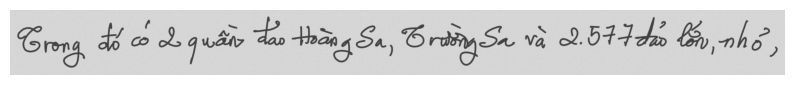

---------------------------------------------------------------------------------------------

Folder: 254 | Image: 16.jpg | CER: 0.00%
✅ Ground-truth: triển, tồn tại tốt.
🤖 Prediction  : triển, tồn tại tốt.


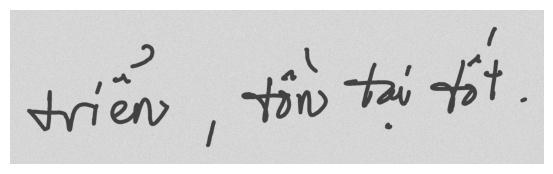

---------------------------------------------------------------------------------------------

Folder: 254 | Image: 17.jpg | CER: 0.00%
✅ Ground-truth: Có tài nguyên sinh vật và khoáng sản phong phú, đa dạng, quý hiếm.
🤖 Prediction  : Có tài nguyên sinh vật và khoáng sản phong phú, đa dạng, quý hiếm.


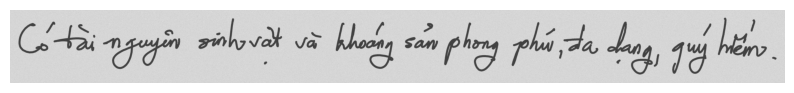

---------------------------------------------------------------------------------------------

Folder: 254 | Image: 18.jpg | CER: 0.00%
✅ Ground-truth: Vùng biển và hải đảo nước ta có vị trí chiến lược hết sức to lớn, có ảnh hưởng
🤖 Prediction  : Vùng biển và hải đảo nước ta có vị trí chiến lược hết sức to lớn, có ảnh hưởng


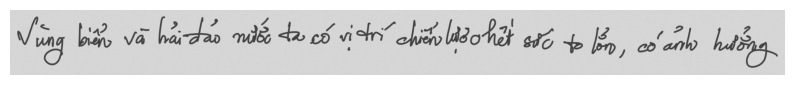

---------------------------------------------------------------------------------------------

Folder: 254 | Image: 19.jpg | CER: 0.00%
✅ Ground-truth: trực tiếp đến sự nghiệp bảo vệ nền độc lập dân tộc và xây dựng chủ nghĩa
🤖 Prediction  : trực tiếp đến sự nghiệp bảo vệ nền độc lập dân tộc và xây dựng chủ nghĩa


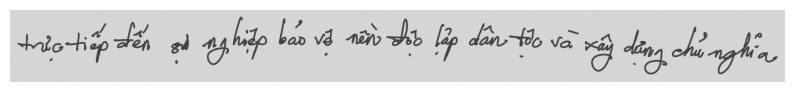

---------------------------------------------------------------------------------------------


In [35]:
# Hiển thị 5 mẫu tốt nhất (CER thấp nhất)
visualize_results(df_results, num_show=5, worst=False)

----- 🚨 Top 5 mẫu tệ nhất (CER cao nhất) -----

Folder: 255 | Image: 7.jpg | CER: 100.00%
✅ Ground-truth: ngờ
🤖 Prediction  : số.


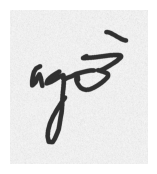

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 13.jpg | CER: 69.23%
✅ Ground-truth: hiệu hiệp sĩ.
🤖 Prediction  : hầm hương à.


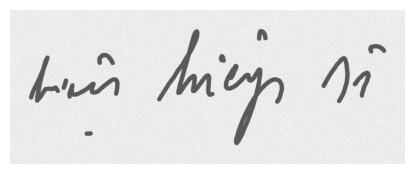

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 36.jpg | CER: 66.15%
✅ Ground-truth: Phải là một câu chuyện đàng hoàng! Nhóm công nhân dũng cảm ấy gồm
🤖 Prediction  : Phân tư mại của chúng tôi hay không? Nhiệm vụ của chúng tôi là góp


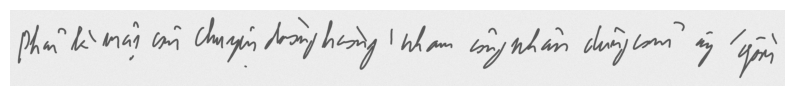

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 41.jpg | CER: 64.06%
✅ Ground-truth: đã làm điều đó? Ba năm trôi qua, chắc hẳn đã hàng trăm, ngàn lần
🤖 Prediction  : để bán được thực tế tại văn phòng, Chính hãnh đã hỏng thêm người bị


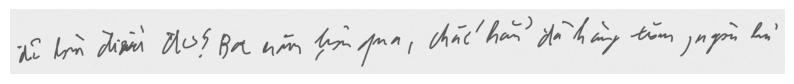

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 22.jpg | CER: 57.53%
✅ Ground-truth: lâu ngày đến vậy? Tôi không phải là người trong lĩnh vực chuyên môn nhưng
🤖 Prediction  : liên ngay đến vùng? Và khi nhận yêu thả nguồn xung kinh tế, việc chuyển mại vùng


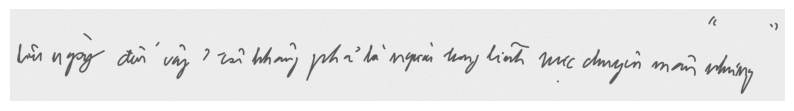

---------------------------------------------------------------------------------------------


In [36]:
# Hiển thị 5 mẫu tệ nhất (CER cao nhất) để phân tích lỗi
visualize_results(df_results, num_show=5, worst=True)